In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/phishing-urls_final.csv')
data0.head()

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,statistical_report,tiny_url,web_traffic,label
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,0,1,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,0,1,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,0,0,1,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,0,1,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,0,0,1,1


In [ ]:
data0.shape


(2015, 17)

In [ ]:
data0.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'statistical_report',
       'tiny_url', 'web_traffic', 'label'],
      dtype='object')

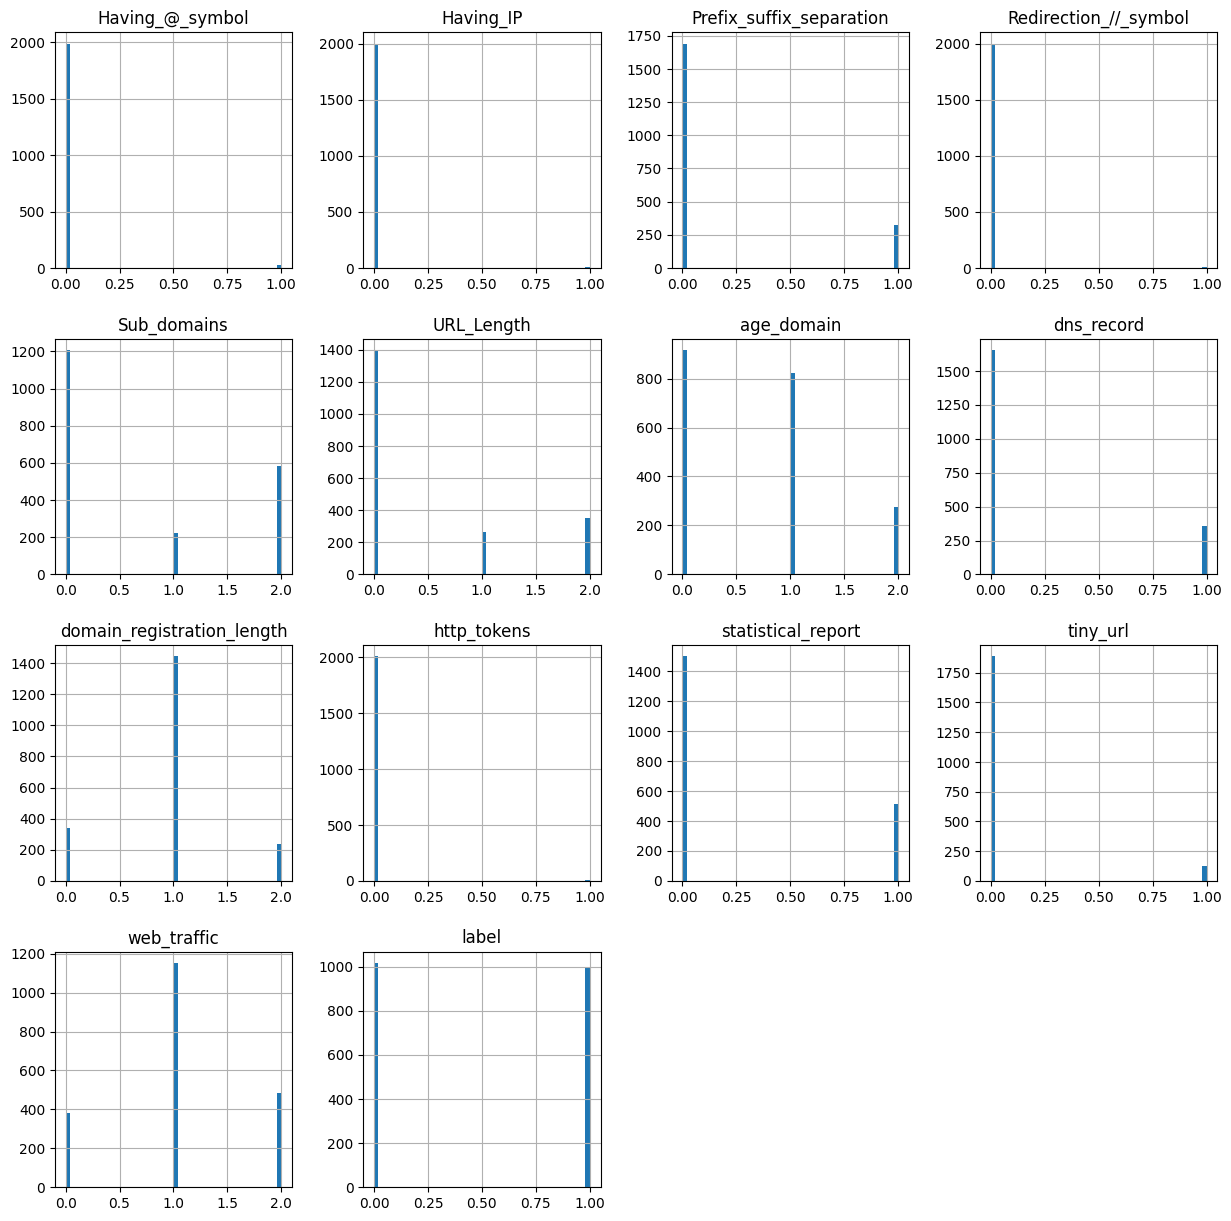

In [ ]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
data0.describe()

,Having_@_symbol,Having_IP,Prefix_suffix_separation,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,statistical_report,tiny_url,web_traffic,label
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,0.011911,0.006452,0.160298,0.006452,0.689826,0.481886,0.682382,0.178660,0.948387,0.003474,0.256079,0.063027,1.050620,0.495285
std,0.108511,0.080082,0.366973,0.080082,0.890516,0.775458,0.701369,0.383162,0.530421,0.058852,0.436575,0.243072,0.652258,0.500102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [ ]:
data = data0.drop(['Path','Domain','Protocol'], axis = 1).copy()

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Having_@_symbol,Having_IP,Prefix_suffix_separation,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,statistical_report,tiny_url,web_traffic,label
0,0,0,0,0,1,2,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,1,1,1,0,1,0,1,0,1,1
3,0,0,0,0,0,0,0,0,1,0,0,0,2,0
4,0,0,0,0,2,0,0,0,1,0,0,1,1,1


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

((2015, 13), (2015,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1612, 13), (403, 13))

**AUTO ENCODER FOR CLASSIFICATION**

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results0


ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 13)                  │             182 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 856 (3.34 KB)

 Trainable params: 856 (3.34 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Ensure the data is in float32 format
X_train = X_train.astype('float32')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0376 - loss: 4.3434 - val_accuracy: 0.0991 - val_loss: 3.5369
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0741 - loss: 3.3635 - val_accuracy: 0.1641 - val_loss: 3.3763
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1446 - loss: 3.3120 - val_accuracy: 0.2941 - val_loss: 3.3295
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2463 - loss: 3.2306 - val_accuracy: 0.3313 - val_loss: 3.2832
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2931 - loss: 3.1605 - val_accuracy: 0.3251 - val_loss: 3.1650
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3451 - loss: 3.0658 - val_accuracy: 0.3591 - val_loss: 3.0089
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3804 - loss: 2.8600 - val_accuracy: 0.3437 - val_loss: 3.0112
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3641 - loss: 2.9099 - val_accuracy: 0.4613 - val_loss

In [ ]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto)' )
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto)' )

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions
train_pred = autoencoder.predict(X_train)
test_pred = autoencoder.predict(X_test)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(X_train, train_pred)
mse_test = mean_squared_error(X_test, test_pred)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(X_train, train_pred)
mae_test = mean_absolute_error(X_test, test_pred)



51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4432 - loss: 2.6996
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4316 - loss: 2.6767 

Autoencoder: Accuracy on training Data: 0.819
Autoencoder: Accuracy on test Data: 0.818
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


AttributeError: 'KerasTensor' object has no attribute 'predict'

In [ ]:
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

In [ ]:
import re
import pandas as pd
import numpy as np
from urllib.parse import urlparse

# Example function to extract features from the URL
def extract_features(url):
    # Parse URL components
    parsed_url = urlparse(url)

    # Extract features
    features = {
        'url_length': len(url),
        'hostname_length': len(parsed_url.netloc),
        'path_length': len(parsed_url.path),
        'query_length': len(parsed_url.query),
        'num_special_chars': len(re.findall(r'[?=&]', url)),
        'has_https': 1 if parsed_url.scheme == 'https' else 0,
        'num_digits': len(re.findall(r'\d', url)),
        'num_subdomains': len(parsed_url.netloc.split('.')) - 1,
        'contains_ip': 1 if re.match(r'\d+\.\d+\.\d+\.\d+', parsed_url.netloc) else 0,
        'num_hyphens': url.count('-'),
    }

    return features

# Example usage
url = 'https://example-phishing.com/login?session=12345'
features = extract_features(url)
print(features)


{'url_length': 48, 'hostname_length': 20, 'path_length': 6, 'query_length': 13, 'num_special_chars': 2, 'has_https': 1, 'num_digits': 5, 'num_subdomains': 1, 'contains_ip': 0, 'num_hyphens': 1}


In [ ]:
# Example: dataset of URLs and their labels (0 for legitimate, 1 for phishing)
urls = ['https://example.com', 'http://malicious.com/fake', 'https://safe-url.org', 'http://phishing-site.com']
labels = [0, 1, 0, 1]  # 0 for legitimate, 1 for phishing

# Extract features for all URLs
url_features = pd.DataFrame([extract_features(url) for url in urls])
url_features['label'] = labels  # Add labels

print(url_features)


   url_length  hostname_length  path_length  query_length  num_special_chars  \
0          19               11            0             0                  0   
1          25               13            5             0                  0   
2          20               12            0             0                  0   
3          24               17            0             0                  0   

   has_https  num_digits  num_subdomains  contains_ip  num_hyphens  label  
0          1           0               1            0            0      0  
1          0           0               1            0            0      1  
2          1           0               1            0            1      0  
3          0           0               1            0            1      1  


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train/Test split
X = url_features.drop('label', axis=1)
y = url_features['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
def classify_url(url, model):
    # Extract features from the input URL
    features = extract_features(url)
    # Convert to DataFrame (expected input shape for the model)
    features_df = pd.DataFrame([features])
    # Predict using the trained model
    prediction = model.predict(features_df)
    return 'Phishing' if prediction[0] == 1 else 'Legitimate'

# Example prediction
new_url = 'godzanointed4him.homestead.com'
result = classify_url(new_url, clf)
print(f'The URL "{new_url}" is classified as: {result}')


The URL "godzanointed4him.homestead.com" is classified as: Legitimate
